In [ ]:
from __future__ import division
import scipy.stats as stats
import numpy as np
import matplotlib.pylab as plt

Set the seed so results are reproducible.

In [2]:
np.random.seed(123)

Number of samples

In [3]:
N = 30

Generate N samples from the standard normal distribution, compute (excess) kurtosis, and repeat this procedure many times to get a distribution for kurtosis.

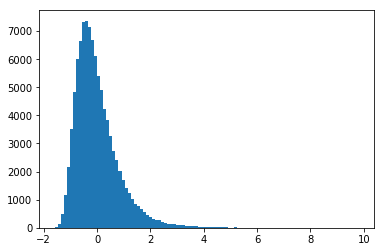

In [4]:
teststats = stats.kurtosis(np.random.normal(size=(N, 100000)), bias=False)
plt.hist(teststats, bins=100);

Compare the sample variance of excess kurtosis with the population variance. On Wikipedia the formula used below for the population variance is claimed to be for unbiased excess kurtosis ($g_2$ as oppoed to $G_2$ in their notation): https://en.wikipedia.org/wiki/Kurtosis#Sample_kurtosis. However, the sample variance for $G_2$ matches the formula much better.

In [5]:
pop_var = 24*N*(N-1)**2 / ((N-3)*(N-2)*(N+3)*(N+5))
sample_var = np.var(teststats)
print("Population variance = {0}. Sample variance = {1}".format(pop_var, sample_var))

Population variance = 0.693465264894. Sample variance = 0.683153503488


Create a sample by drawing N numbers from the standard normal distribution. Compute the sample kurtosis.

In [6]:
sample = np.random.normal(size=N)
observed_kurt = stats.kurtosis(sample, bias=False)
print("Sample kurtosis = {0}".format(observed_kurt))

Sample kurtosis = 1.73345838003


Now let's compute p-value and z-score using `scipy.stats.kurtosistest` and try to reproduce the results.

In [7]:
scipy_z, scipy_p = stats.kurtosistest(sample)
print("Scipy z-score = {0}. Scipy p-value = {1}".format(scipy_z, scipy_p))

Scipy z-score = 1.75810190662. Scipy p-value = 0.0787301714358


Reproduce the two-sided p-value.

In [8]:
pval = 2 * min(
    len(teststats[teststats > observed_kurt]),
    len(teststats[teststats < observed_kurt])
) / len(teststats)
print("Reproduced p-value = {0}".format(pval))

Reproduced p-value = 0.07676


Compute z-score from p-value by mapping the test statistic distribution to the standard normal distribution. We ask: up to what value $\text{p-value} / 2$ worth of probability is captured? We also need to get the sign right: if the sample kurtosis is positive, z-score should be positivie, and vice versa.

In [9]:
zscore = -1 * stats.norm.ppf(pval/2) * np.sign(observed_kurt)
print("Reproduced z-score = {0}".format(zscore))

Reproduced z-score = 1.76980278375


Summary of results

In [10]:
print("p-value: Scipy = {0}, Reproduced = {1}".format(scipy_p, pval))
print("z-score: Scipy = {0}, Reproduced = {1}".format(scipy_z, zscore))

p-value: Scipy = 0.0787301714358, Reproduced = 0.07676
z-score: Scipy = 1.75810190662, Reproduced = 1.76980278375
